<a href="https://colab.research.google.com/github/Nassim-Hb/Python_project/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to my python project based on a dataset about league of legends.

Im a big fan of this game and I spend a lot of time on it.

First I will explain what is league of legends to understand a little bit more the game.

League of Legends (LoL) is a multiplayer online battle arena (MOBA) video game developed and published by Riot Games. It was released in October 2009 and is one of the most popular and widely played games in the world, with a large and active player base. In the game, players control a champion character with unique abilities and work with their team to destroy the enemy team's nexus, which is located at the heart of their base. The game is known for its fast-paced and highly competitive gameplay, as well as its extensive roster of champions and regular updates.

In League of Legends, champions are the playable characters that players control in the game. Each champion has their own unique set of abilities, strengths, and weaknesses, and they can be played in various roles such as top lane, mid lane, bottom lane (Include 2 players ADC and Support), or jungle. Some of the champions are designed for dealing physical damage, while others are designed for dealing magic damage or providing utility and support for the team.

There are currently 162 champions in League of Legends, and new champions are added periodically through updates. Champions can be obtained by purchasing them with in-game currency (IP) or with real money (RP), and players can also earn champions through the game's rotating weekly free champion roster.

The champions in League of Legends are diverse, ranging from melee fighters to ranged mages, tanks to assassins, and everything in between. Each champion has a unique playstyle and can be played in multiple ways, making League of Legends a highly strategic and tactical game. To be successful in the game, players must understand the strengths and weaknesses of each champion and how they can be used in combination with their team to achieve victory.

In this project we will focus on the champions of league of legends and we will see all the necessary stats of them in ranked games.

In [ ]:
#First we add the pandas and numpy libraries and we import the dateset file that we have in our folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
data_to_load = files.upload()

Saving Dataset_lol_s13.csv to Dataset_lol_s13.csv


In [ ]:
#We read the dataset and we can see that there is 244 rows
import io
df = pd.read_csv(io.BytesIO(data_to_load['Dataset_lol_s13.csv']), sep= ';')
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95,79.72,2.67,1.40,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14,87.85,3.45,1.45,2.60
242,Zoe,Mage,SUPPORT,D,28.33,-3.55,47.73,10.03,0.37,1.45,2.14


The fact that there is 244 rows but only 162 champions it's because some champions can play in different roles as we can see line 2 and 3 Akali can be played in top and mid.

In [ ]:
#To have information concerning each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    244 non-null    object 
 1   Class   243 non-null    object 
 2   Role    244 non-null    object 
 3   Tier    244 non-null    object 
 4   Score   244 non-null    float64
 5   Trend   244 non-null    float64
 6   Win %   244 non-null    float64
 7   Role %  244 non-null    float64
 8   Pick %  244 non-null    float64
 9   Ban %   244 non-null    float64
 10  KDA     244 non-null    float64
dtypes: float64(7), object(4)
memory usage: 21.1+ KB


DATA TRANSFORMATION + DATA WRANGLING

In [ ]:
#Now we create another dateframe to see which champions have the best winrate
winrate = df.sort_values(by=['Win %'], ascending = False)
winrate.head(20)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
166,Singed,Tank,MID,A,51.22,-7.41,55.15,19.51,0.50,0.61,2.83
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
89,Kled,Fighter,MID,B,47.23,-4.27,53.93,11.75,0.29,0.95,2.65
115,Nasus,Fighter,MID,B,46.24,-3.06,53.66,14.69,0.52,4.19,2.39
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
77,Karthus,Mage,ADC,C,36.72,1.43,53.28,26.01,0.93,1.67,2.28
136,Quinn,Marksman,TOP,A,48.15,4.40,53.27,77.05,1.30,0.60,1.93
232,Zac,Tank,TOP,A,53.65,2.22,53.24,13.56,1.29,14.77,2.73
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
27,Cho'Gath,Tank,MID,B,45.34,-1.60,53.13,20.82,0.45,0.76,2.47


In [ ]:
#Here we can find a rank of the pickrate of every champions, I put only the first 10 champions
pickrate = df.sort_values(by=['Pick %'], ascending = False)
pickrate.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
23,Caitlyn,Marksman,ADC,God,93.30,1.35,50.37,96.12,20.28,18.56,2.30
72,Kai'Sa,Marksman,ADC,God,81.95,-1.78,50.83,96.92,18.91,3.81,2.51
39,Ezreal,Marksman,ADC,God,74.09,-4.86,48.39,94.75,18.55,3.53,2.40
69,Jhin,Marksman,ADC,God,83.12,3.82,51.43,92.56,17.41,3.40,3.06
99,Lux,Mage,SUPPORT,God,93.53,0.79,51.19,70.69,13.65,10.76,2.56
113,Nami,Support,SUPPORT,God,91.91,5.24,51.61,99.70,13.02,6.89,3.29
65,Jax,Fighter,TOP,God,93.31,27.78,51.94,85.83,12.04,21.85,1.75
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
224,Yasuo,Fighter,MID,God,83.58,14.87,49.44,72.19,11.73,19.86,1.75
200,Varus,Marksman,ADC,S,59.60,4.29,50.18,85.55,11.57,3.82,2.42


In [ ]:
#Here we can find a rank of the banrate of every champions, I put only the first 10 champions
pickrate = df.sort_values(by=['Ban %'], ascending = False)
pickrate.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
234,Zed,Assassin,JUNGLE,D,34.73,-23.06,44.36,18.28,2.27,36.90,2.31
233,Zed,Assassin,MID,God,88.26,1.05,48.68,77.39,10.00,36.90,2.22
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
106,Maokai,Tank,SUPPORT,A,48.63,0.76,51.42,20.67,2.63,27.50,2.27
153,Samira,Marksman,ADC,God,75.02,5.30,52.01,98.08,11.97,26.31,2.37
112,Morgana,Mage,SUPPORT,God,71.50,-8.61,50.06,89.94,7.26,25.67,2.52
177,Sylas,Mage,MID,God,68.15,6.88,49.61,43.68,7.47,22.96,2.17
176,Sylas,Mage,JUNGLE,God,74.63,-16.47,49.50,50.53,8.73,22.96,2.52
30,Darius,Fighter,TOP,God,77.98,-7.00,49.88,94.72,9.34,22.42,1.87


In [ ]:
#Here we can find a rank of the KDA of every champions, I put only the first 10 champions
pickrate = df.sort_values(by=['KDA'], ascending = False)
pickrate.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
230,Yuumi,Support,SUPPORT,S,64.45,-25.55,44.44,98.81,7.96,19.86,3.88
61,Ivern,Support,JUNGLE,B,44.56,11.20,50.92,80.70,1.13,0.44,3.66
239,Zilean,Support,MID,A,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
231,Zac,Tank,JUNGLE,God,70.73,7.78,52.12,69.42,6.49,14.77,3.53
222,Xerath,Mage,MID,B,47.33,-0.79,50.34,27.42,1.36,3.11,3.30
113,Nami,Support,SUPPORT,God,91.91,5.24,51.61,99.70,13.02,6.89,3.29
154,Sejuani,Tank,JUNGLE,A,54.13,3.34,50.69,81.96,4.31,0.91,3.27
63,Janna,Support,SUPPORT,A,56.18,-6.27,51.30,97.90,4.50,1.50,3.18
75,Karma,Mage,MID,B,47.01,0.00,50.63,10.41,1.29,3.42,3.17
139,Rammus,Tank,JUNGLE,A,49.09,-29.03,51.19,90.80,2.64,8.72,3.13


In [ ]:
#We can also see the best winrate of every champions with at least a minimum 3% of pickrate
pickrate_bigger_than_3 = winrate[winrate['Pick %'] > 3]
pickrate_bigger_than_3.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
172,Sona,Support,SUPPORT,S,57.90,1.03,53.03,97.61,4.29,0.27,2.99
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87,49.07,4.44,5.20,2.82
197,Udyr,Fighter,JUNGLE,S,67.49,-18.46,52.54,80.53,6.18,19.75,2.72
8,Amumu,Tank,SUPPORT,A,52.62,1.09,52.39,50.05,4.09,5.20,2.18
37,Elise,Mage,JUNGLE,God,69.88,16.71,52.37,96.95,6.93,11.73,2.90
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
58,Illaoi,Fighter,TOP,A,55.97,2.28,52.29,94.06,4.55,6.75,1.48
124,Olaf,Fighter,TOP,A,52.96,3.76,52.21,80.16,3.34,2.37,1.87


In [ ]:
#We specify only for jungle role so we can have all the jungle champions with the most winrate and with a minimum of 3% pickrate
pickrate_bigger_than_3_jungle = pickrate_bigger_than_3[pickrate_bigger_than_3['Role'] == 'JUNGLE']
pickrate_bigger_than_3_jungle.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
105,Maokai,Tank,JUNGLE,God,97.26,50.00,54.31,75.40,9.84,27.50,3.02
7,Amumu,Tank,JUNGLE,S,57.41,16.78,52.87,49.07,4.44,5.20,2.82
197,Udyr,Fighter,JUNGLE,S,67.49,-18.46,52.54,80.53,6.18,19.75,2.72
37,Elise,Mage,JUNGLE,God,69.88,16.71,52.37,96.95,6.93,11.73,2.90
231,Zac,Tank,JUNGLE,God,70.73,7.78,52.12,69.42,6.49,14.77,3.53
40,Fiddlesticks,Mage,JUNGLE,A,52.68,4.53,52.09,85.92,3.68,2.87,2.84
209,Vi,Fighter,JUNGLE,S,59.27,2.89,51.82,96.07,5.96,1.49,2.58
218,Wukong,Fighter,JUNGLE,S,58.65,5.14,51.41,77.35,5.62,2.71,2.80
35,Ekko,Assassin,JUNGLE,S,65.07,-5.43,50.98,71.07,7.27,6.21,2.81
18,Bel'Veth,Fighter,JUNGLE,A,49.90,-3.44,50.94,94.30,3.89,8.20,2.39


In [ ]:
pickrate_bigger_than_3_mid = pickrate_bigger_than_3[pickrate_bigger_than_3['Role'] == 'MID']
pickrate_bigger_than_3_mid.head(10)

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
9,Anivia,Mage,MID,S,59.33,9.21,53.22,86.04,3.60,3.56,3.03
79,Kassadin,Assassin,MID,God,88.29,26.27,52.30,97.44,7.72,36.28,2.71
100,Lux,Mage,MID,S,63.16,4.64,51.54,26.49,5.12,10.76,3.03
104,Malzahar,Mage,MID,A,52.98,-0.67,51.52,90.90,3.69,3.69,2.35
208,Vex,Mage,MID,S,57.42,2.30,51.27,94.12,4.79,6.57,2.47
211,Viktor,Mage,MID,S,58.97,3.79,51.10,95.85,5.76,2.89,2.32
96,Lissandra,Mage,MID,A,51.49,6.18,50.81,93.66,3.53,0.89,2.52
59,Irelia,Fighter,MID,S,63.06,8.17,50.75,50.98,6.70,16.82,1.85
227,Yone,Assassin,MID,God,67.90,6.47,50.42,63.80,8.52,10.53,1.94
151,Ryze,Mage,MID,S,64.07,23.14,50.06,88.06,7.45,4.14,2.47


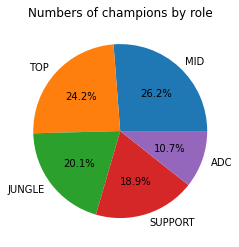

In [ ]:
#Here is a method to count the number of champions by role
role_counts = df["Role"].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%')
plt.title("Numbers of champions by role")
plt.show()

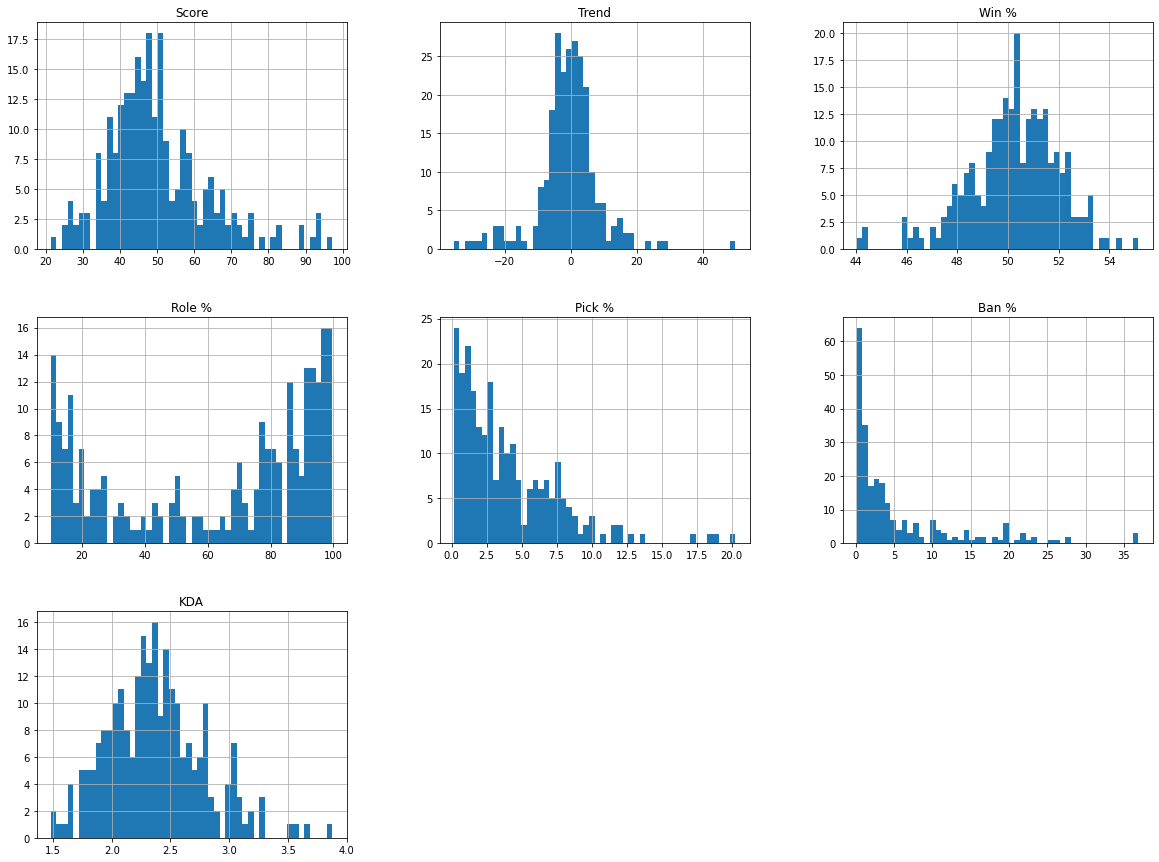

In [ ]:
# We can visualize the distribution of each column using histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Check if there are any missing values in the DataFrame
print(df.isnull().sum())

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64


In [ ]:
#There is only one missing value concerning the class name of K'SANTE the new champion they didnt gave him a class so I will add FIGHTER
df.loc[df['Name'] == "K'Sante", 'Class'] = 'Fighter'
print(df.isnull().sum())
#Now we can see that there is no more missing value

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64


Now I want to remove all the rows of champions with a lowest pickrate than 0.5 because this is not interesting those champions are played only by a little percentage of players and I think this is not usefull for our data exploration.

In [ ]:
pickrate_to_low = df.loc[df['Pick %'] < 0.5]
pickrate_to_low

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
11,Annie,Mage,SUPPORT,D,26.80,0.67,47.00,13.05,0.21,0.37,2.27
27,Cho'Gath,Tank,MID,B,45.34,-1.60,53.13,20.82,0.45,0.76,2.47
41,Fiddlesticks,Mage,SUPPORT,C,36.06,-1.15,51.43,10.34,0.38,2.74,2.11
45,Galio,Tank,SUPPORT,D,31.58,-5.57,48.87,15.56,0.42,0.32,2.29
62,Ivern,Support,SUPPORT,D,25.15,-4.12,45.89,10.94,0.14,0.41,2.46
76,Karthus,Mage,MID,C,36.86,-8.67,49.37,12.72,0.37,1.67,2.28
82,Kayle,Fighter,MID,C,38.48,-6.88,50.45,16.68,0.38,0.46,2.19
84,Kennen,Mage,MID,C,37.56,-6.98,49.76,16.06,0.25,0.32,2.35
89,Kled,Fighter,MID,B,47.23,-4.27,53.93,11.75,0.29,0.95,2.65
95,Lillia,Fighter,TOP,D,30.76,-9.48,46.17,11.32,0.37,1.56,1.89
